<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Homework_4_ML/Homework_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

1. Plot your regression model for SVR similar to the sample code provided on Canvas.

2. Compare your results against linear regression with regularization loss that you already did in homework1.

3. Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy.

4. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML_ECGR5105/Housing.csv")
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [6]:
# Mapping categorical to numerical values
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [7]:
# Load and Preprocess the Data
# Perform necessary preprocessing (e.g., encoding categorical variables, handling missing values)
# Separate features (X) and target (y)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = df['price']




Problem 1 and 2

In [8]:
# Add noise to targets
# Add noise to 'price'
num_samples = len(y)
noise_indices = np.arange(0, num_samples, 5)
y.iloc[noise_indices] += 3 * (0.5 - np.random.rand(len(noise_indices)))


<ipython-input-8-43b79c30fa88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[noise_indices] += 3 * (0.5 - np.random.rand(len(noise_indices)))


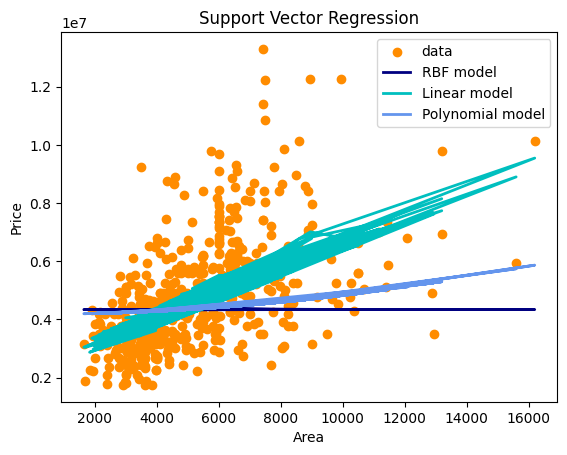

RBF Model - MAE: 1397890.7163819808, MSE: 3666470008862.1973, R2: -0.04992518669023971
Linear Model - MAE: 1036961.6464445175, MSE: 2112528153549.881, R2: 0.39505941392043475
Polynomial Model - MAE: 1329315.6275746925, MSE: 3346905917364.667, R2: 0.041584736373105224


In [11]:

# Initialize SVR models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Fit SVR models
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Look at the results
lw = 2
plt.scatter(X['area'], y, color='darkorange', label='data')  # Assuming 'area' is one of the features
plt.plot(X['area'], y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X['area'], y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X['area'], y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for RBF model
mae_rbf = mean_absolute_error(y, y_rbf)
mse_rbf = mean_squared_error(y, y_rbf)
r2_rbf = r2_score(y, y_rbf)

# Calculate metrics for Linear model
mae_lin = mean_absolute_error(y, y_lin)
mse_lin = mean_squared_error(y, y_lin)
r2_lin = r2_score(y, y_lin)

# Calculate metrics for Polynomial model
mae_poly = mean_absolute_error(y, y_poly)
mse_poly = mean_squared_error(y, y_poly)
r2_poly = r2_score(y, y_poly)

# Print the metrics
print(f"RBF Model - MAE: {mae_rbf}, MSE: {mse_rbf}, R2: {r2_rbf}")
print(f"Linear Model - MAE: {mae_lin}, MSE: {mse_lin}, R2: {r2_lin}")
print(f"Polynomial Model - MAE: {mae_poly}, MSE: {mse_poly}, R2: {r2_poly}")



problem 3 and 4

The best MSE (5524031814903.362) is achieved with K = 2.


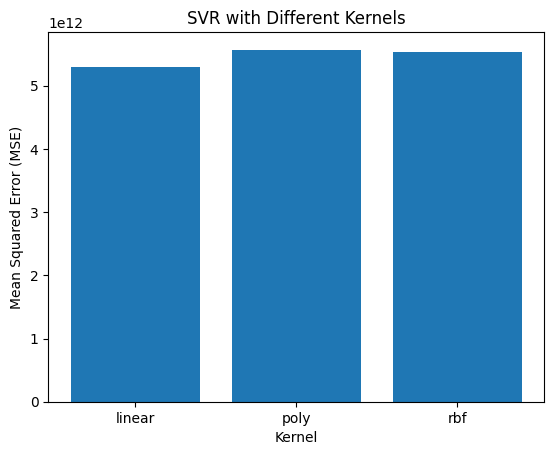

The best MSE (5294884663834.087) is achieved with the linear kernel.
The MSE for Linear kernel is 5294884663834.087
The best K for Linear kernel is 2
The MSE for Polynomial kernel is 5454395354072.361
The best K for Polynomial kernel is 2


In [18]:

from sklearn.metrics import mean_squared_error


# Apply Min-Max scaling to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for feature extraction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Perform independent trainings with varying K
K_values = range(1, min(X_train.shape[1], len(y_train))+1)
mse_values = []

for K in K_values:
    svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr.fit(X_train[:, :K], y_train)
    y_pred = svr.predict(X_test[:, :K])
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Identify the best MSE and corresponding K
best_mse = min(mse_values)
best_k = K_values[mse_values.index(best_mse)]
print(f"The best MSE ({best_mse}) is achieved with K = {best_k}.")


# Explore different kernel tricks
kernels = ['linear', 'poly', 'rbf']
kernel_accuracies = []

for kernel in kernels:
    svr = SVR(kernel=kernel, C=1e3, gamma=0.1)
    svr.fit(X_train[:, :optimal_K], y_train)
    y_pred = svr.predict(X_test[:, :optimal_K])
    accuracy = mean_squared_error(y_test, y_pred)
    kernel_accuracies.append(accuracy)

# Compare accuracies for different kernels
plt.bar(kernels, kernel_accuracies)
plt.xlabel('Kernel')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SVR with Different Kernels')
plt.show()


# Identify the best MSE and corresponding kernel
best_mse = min(kernel_accuracies)
best_kernel = kernels[np.argmin(kernel_accuracies)]
print(f"The best MSE ({best_mse}) is achieved with the {best_kernel} kernel.")

svr = SVR(kernel='linear', C=1e3)
svr.fit(X_train[:, :optimal_K], y_train)
y_pred_linear = svr.predict(X_test[:, :optimal_K])
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"The MSE for Linear kernel is {mse_linear}")
print(f"The best K for Linear kernel is {optimal_K}")

# Identify the best MSE and corresponding K for Polynomial kernel
svr = SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train[:, :optimal_K], y_train)
y_pred_poly = svr.predict(X_test[:, :optimal_K])
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"The MSE for Polynomial kernel is {mse_poly}")
print(f"The best K for Polynomial kernel is {optimal_K}")


In [17]:
# ... (previous code remains the same)

# Identify the best MSE and corresponding K for RBF kernel
best_mse_rbf = min(mse_values)
best_k_rbf = K_values[mse_values.index(best_mse_rbf)]
print(f"The best MSE for RBF kernel ({best_mse_rbf}) is achieved with K = {best_k_rbf}.")

# Identify the best MSE and corresponding K for Linear kernel
svr = SVR(kernel='linear', C=1e3)
svr.fit(X_train[:, :optimal_K], y_train)
y_pred_linear = svr.predict(X_test[:, :optimal_K])
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"The MSE for Linear kernel is {mse_linear}")

# Identify the best MSE and corresponding K for Polynomial kernel
svr = SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train[:, :optimal_K], y_train)
y_pred_poly = svr.predict(X_test[:, :optimal_K])
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"The MSE for Polynomial kernel is {mse_poly}")


The best MSE for RBF kernel (5524031814903.362) is achieved with K = 2.
The MSE for Linear kernel is 5294884663834.087
The MSE for Polynomial kernel is 5454395354072.361
